In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from sklearn.metrics import mean_squared_error, r2_score

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

FS_DT = pd.read_csv('../data/FS_decision_tree.csv').values.flatten()
FS_RF = pd.read_csv('../data/FS_random_forest.csv').values.flatten()

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2341, 142), (586, 142), (2341, 1), (586, 1))

# Neural Network

In [23]:
st = StandardScaler()
scaled_X_train = st.fit_transform(X_train)

# Model
model = Sequential()
model.add(Dense(200, input_dim=142, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))

# Compile model
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(), metrics=['mean_squared_error'])

hist = model.fit(x=scaled_X_train, y=Y_train, epochs=500, validation_split=.2)

Epoch 1/500
59/59 [==============================] - 1s 6ms/step - loss: 26.9437 - mean_squared_error: 26.9437 - val_loss: 0.5342 - val_mean_squared_error: 0.5342
Epoch 2/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1753 - mean_squared_error: 0.1753 - val_loss: 0.1086 - val_mean_squared_error: 0.1086
Epoch 3/500
59/59 [==============================] - 0s 2ms/step - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.0813 - val_mean_squared_error: 0.0813
Epoch 4/500
59/59 [==============================] - 0s 2ms/step - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.0644 - val_mean_squared_error: 0.0644
Epoch 5/500
59/59 [==============================] - 0s 2ms/step - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.0556 - val_mean_squared_error: 0.0556
Epoch 6/500
59/59 [==============================] - 0s 2ms/step - loss: 0.0494 - mean_squared_error: 0.0494 - val_loss: 0.0509 - val_mean_squared_error: 0.0509
Epoch 7/500
59/59 [=============

Training MSE: 0.0002809491415973753
Validation MSE: 0.01608055830001831


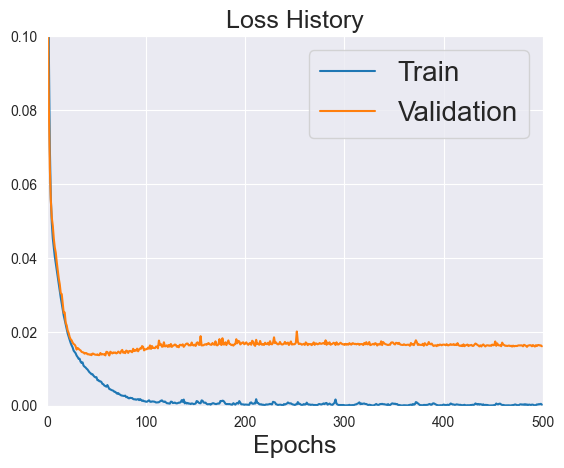

In [24]:
fig, axes = plt.subplots()

axes.plot(hist.history['loss'], label='Train')
axes.plot(hist.history['val_loss'], label='Validation')
axes.set_title("Loss History", fontsize=18)
axes.set_xlabel("Epochs", fontsize=18)
axes.legend(fontsize=20)
axes.set_xlim([0, 500])
axes.set_ylim([0, 0.1])

# Final accuracy
print ("Training MSE:", hist.history['mean_squared_error'][-1])
print ("Validation MSE:", hist.history['val_mean_squared_error'][-1])

In [25]:
model.evaluate(scaled_X_train, Y_train)
train_pre = model.predict(scaled_X_train)

74/74 [==============================] - 0s 820us/step


In [26]:
scaled_X_test = st.transform(X_test)
model.evaluate(scaled_X_test, Y_test)
test_pre = model.predict(scaled_X_test)

19/19 [==============================] - 0s 945us/step


In [27]:
print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 151555251.953
Test MSE: 621664066.550
Train R^2: 0.975
Test R^2: 0.923


Text(0, 0.5, 'Sale_Price')

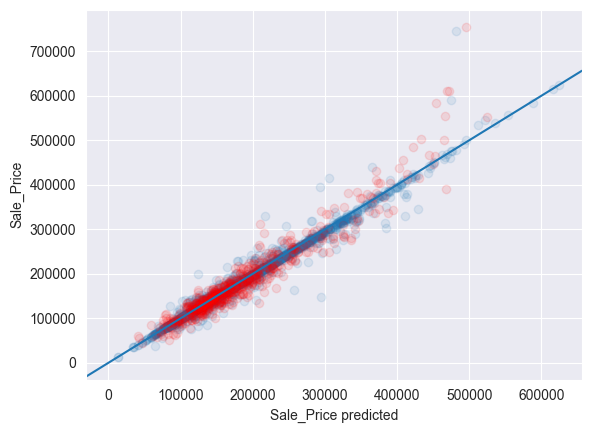

In [28]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

## Proviamo a ridurre l'overfitting aggiungendo dei Dropout layer

In [29]:
# Model
model = Sequential()
model.add(Dense(200, input_dim=142, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))

# Compile model
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(), metrics=['mean_squared_error'])

hist = model.fit(x=scaled_X_train, y=Y_train, epochs=500, validation_split=.2)

Epoch 1/500
59/59 [==============================] - 1s 5ms/step - loss: 104.2909 - mean_squared_error: 104.2909 - val_loss: 64.2134 - val_mean_squared_error: 64.2134
Epoch 2/500
59/59 [==============================] - 0s 2ms/step - loss: 39.1215 - mean_squared_error: 39.1215 - val_loss: 5.6645 - val_mean_squared_error: 5.6645
Epoch 3/500
59/59 [==============================] - 0s 2ms/step - loss: 22.0574 - mean_squared_error: 22.0574 - val_loss: 2.5413 - val_mean_squared_error: 2.5413
Epoch 4/500
59/59 [==============================] - 0s 2ms/step - loss: 17.1445 - mean_squared_error: 17.1445 - val_loss: 1.8895 - val_mean_squared_error: 1.8895
Epoch 5/500
59/59 [==============================] - 0s 2ms/step - loss: 16.1951 - mean_squared_error: 16.1951 - val_loss: 1.7981 - val_mean_squared_error: 1.7981
Epoch 6/500
59/59 [==============================] - 0s 2ms/step - loss: 16.2302 - mean_squared_error: 16.2302 - val_loss: 2.1143 - val_mean_squared_error: 2.1143
Epoch 7/500
59/59 

Training MSE: 0.019014621153473854
Validation MSE: 0.017756249755620956


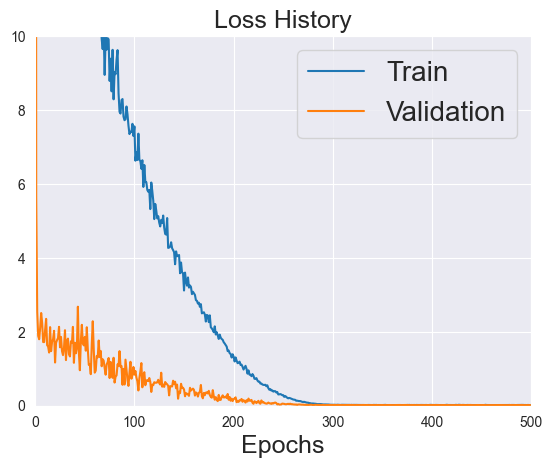

In [30]:
fig, axes = plt.subplots()

axes.plot(hist.history['loss'], label='Train')
axes.plot(hist.history['val_loss'], label='Validation')
axes.set_title("Loss History", fontsize=18)
axes.set_xlabel("Epochs", fontsize=18)
axes.legend(fontsize=20)
axes.set_xlim([0, 500])
axes.set_ylim([0, 10])

# Final accuracy
print ("Training MSE:", hist.history['mean_squared_error'][-1])
print ("Validation MSE:", hist.history['val_mean_squared_error'][-1])

In [31]:
model.evaluate(scaled_X_train, Y_train)
train_pre = model.predict(scaled_X_train)

74/74 [==============================] - 0s 921us/step


In [32]:
model.evaluate(scaled_X_test, Y_test)
test_pre = model.predict(scaled_X_test)

19/19 [==============================] - 0s 1ms/step


In [33]:
print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 384515217.972
Test MSE: 1160109389.679
Train R^2: 0.936
Test R^2: 0.856


## Proviamo a ridurre il numero di features

In [34]:
st = StandardScaler()
scaled_X_train_reduced = st.fit_transform(X_train[FS_RF])

# Model
model = Sequential()
model.add(Dense(200, input_dim=len(FS_RF), activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam())

model.fit(x=scaled_X_train_reduced, y=Y_train, epochs=500)

Epoch 1/500
74/74 [==============================] - 1s 2ms/step - loss: 62.7757
Epoch 2/500
74/74 [==============================] - 0s 2ms/step - loss: 1.2791
Epoch 3/500
74/74 [==============================] - 0s 2ms/step - loss: 0.1593
Epoch 4/500
74/74 [==============================] - 0s 2ms/step - loss: 0.1542
Epoch 5/500
74/74 [==============================] - 0s 2ms/step - loss: 0.1431
Epoch 6/500
74/74 [==============================] - 0s 2ms/step - loss: 0.1177
Epoch 7/500
74/74 [==============================] - 0s 2ms/step - loss: 0.0934
Epoch 8/500
74/74 [==============================] - 0s 2ms/step - loss: 0.0778
Epoch 9/500
74/74 [==============================] - 0s 2ms/step - loss: 0.0683
Epoch 10/500
74/74 [==============================] - 0s 2ms/step - loss: 0.0631
Epoch 11/500
74/74 [==============================] - 0s 2ms/step - loss: 0.0601
Epoch 12/500
74/74 [==============================] - 0s 2ms/step - loss: 0.0579
Epoch 13/500
74/74 [================

In [35]:
model.evaluate(scaled_X_train_reduced, Y_train)
train_pre = model.predict(scaled_X_train_reduced)

74/74 [==============================] - 0s 769us/step


In [36]:
scaled_X_test_reduced = st.transform(X_test[FS_RF])
model.evaluate(scaled_X_test_reduced, Y_test)
test_pre = model.predict(scaled_X_test_reduced)

19/19 [==============================] - 0s 978us/step


In [37]:
print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 6750028.341
Test MSE: 593499269.294
Train R^2: 0.999
Test R^2: 0.926


Text(0, 0.5, 'Sale_Price')

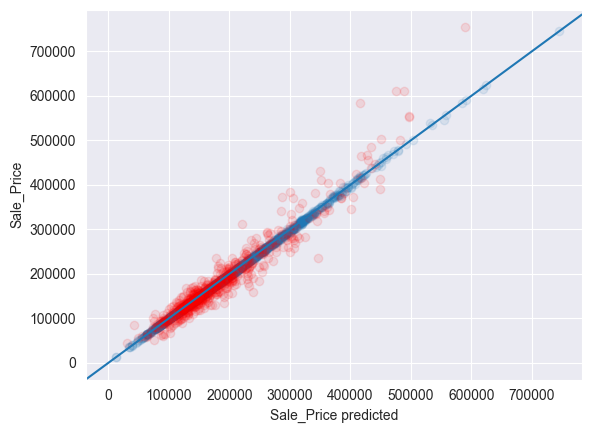

In [38]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')